# MLP_ANN，人工神经网络（多层）

In [1]:
feature_name = ['TED利差','三个月shibor的实际波动率','银行间市场7日回购利率','期限利差','信用利差','中债综合指数实际波动率','上证工业指数实际波动率','上证商业指数实际波动率','上证工业指数CMAX','上证商业指数CMAX','上证工业指数股票非流动性','上证商业指数股票非流动性','180金融指数实际波动率','180金融指数CMAX','180金融指数股票非流动性','地产指数的实际波动率','地产指数CMAX','地产指数股票非流动性','美元兑人民币汇率波动率','1年期离岸NDF波动率']

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#读取数据
data = pd.read_csv('C:/Users/ganziqi/Desktop/论文资料/数据/ML data3.csv',encoding='gbk')
#转换日期格式
data['date'] = pd.to_datetime(data['date'])
data.head()
# data['risk_level']=data['risk_level'].shift(30)
# data = data[data['risk_level'].notna()]#删除某列中含有缺失值的行

# #将特征矩阵和标签Y分开、归一化
max_min_scaler = lambda x : (x-np.min(x))/(np.max(x)-np.min(x))
# X = data.iloc[:,1:-1].drop('SETBI_RealVolatility',axis = 1).apply(max_min_scaler)
X = data.iloc[:,1:-1].apply(max_min_scaler)
Y = data.iloc[:,-1]

X = np.array(X)
Y = np.array(Y)

In [3]:
from sklearn.neural_network import MLPClassifier # 导入神经网络
np.random.seed(0)  # 保证每次数据唯一性
# indices = np.random.permutation(len(X)) # 随机产生一个序列，或是返回一个排列范围，为拆分数据做准备

In [4]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=0)

In [5]:
#slover 是权重优化策略； activation 表示选择的激活函数，这里没有设置，默认是 relu；
#alpha 是惩罚参数；hidden_layer_sizes 是隐藏层大小,为一个列表，长度就是隐藏层的数量，列表中第i个位置上的数为第i个隐藏层的神经元数量；
#random_state 是初始化所使用的随机项；
#activation: 为激活函数，relu, logistic, tanh
#solver：优化算法，lbfgs, sgd, adam。adam适用于较大的数据集，lbfgs适用于较小的数据集。

clf = MLPClassifier(solver='lbfgs',activation='tanh',
                   hidden_layer_sizes=(20,10,20), random_state=0)
clf.fit(Xtrain,ytrain) #拟合
y_predict = clf.predict(Xtest)
score=clf.score(Xtest,ytest,sample_weight=None)
print('y_predict = ')  
print(y_predict)  
print('y_test = ')
print(ytest)    
print('Accuracy:',score)
print('layers nums :',clf.n_layers_)

y_predict = 
[1 0 0 ... 1 1 1]
y_test = 
[1 0 0 ... 1 1 1]
Accuracy: 0.9435897435897436
layers nums : 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [6]:
#多层ann也就是把hidden_layer_sizes=[20，10, 10]，这个参数的列表中多放几个数，放几个数就有几层
ann_model = MLPClassifier(hidden_layer_sizes=[20,10,20], alpha=1e-5, activation='tanh', solver='lbfgs', random_state=0)
ann_model.fit(Xtrain, ytrain)
print('准确率：{:.3f}'.format(ann_model.score(Xtest, ytest)))
# plot_class_regions_for_classifier(ann_model, Xtest.values, ytest.values)

准确率：0.938


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [7]:
#最优参数
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,activation='tanh',
                   hidden_layer_sizes=(20,10,20), random_state=0)
clf.fit(Xtrain,ytrain) #拟合
y_predict = clf.predict(Xtest)
score=clf.score(Xtest,ytest,sample_weight=None)
print('y_predict = ')  
print(y_predict)  
print('y_test = ')
print(ytest)    
print('Accuracy:',score)
print('layers nums :',clf.n_layers_)

y_predict = 
[1 0 0 ... 1 1 1]
y_test = 
[1 0 0 ... 1 1 1]
Accuracy: 0.9376068376068376
layers nums : 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# 模型评估指标

In [8]:
#打印测试结果和真实标签的准确率
from sklearn.metrics import classification_report,confusion_matrix as cm
print(classification_report(y_predict, ytest))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       161
           1       0.97      0.94      0.95       796
           2       0.93      0.95      0.94       213

    accuracy                           0.94      1170
   macro avg       0.91      0.93      0.92      1170
weighted avg       0.94      0.94      0.94      1170



In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
evaluates = ['accuracy','precision','recall','f1']
y_train_pred = clf.predict(Xtrain)
y_test_pred = clf.predict(Xtest)
# accuracy
train_accuracy = clf.score(Xtrain, ytrain)
test_accuracy = clf.score(Xtest, ytest)
# precision
train_precision_macro = precision_score(ytrain, y_train_pred,average="macro")
test_precision_macro = precision_score(ytest, y_test_pred,average="macro")
train_precision_micro = precision_score(ytrain, y_train_pred,average="micro")
test_precision_micro = precision_score(ytest, y_test_pred,average="micro")
# recall
train_recall_macro = recall_score(ytrain, y_train_pred,average="macro")
test_recall_macro = recall_score(ytest, y_test_pred,average="macro")
train_recall_micro = recall_score(ytrain, y_train_pred,average="micro")
test_recall_micro = recall_score(ytest, y_test_pred,average="micro")
# f1
train_f1_macro = f1_score(ytrain, y_train_pred,average="macro")
test_f1_macro = f1_score(ytest, y_test_pred,average="macro")
train_f1_micro = f1_score(ytrain, y_train_pred,average="micro")
test_f1_micro = f1_score(ytest, y_test_pred,average="micro")

print("训练集macro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(train_accuracy,train_precision_macro,train_recall_macro,train_f1_macro))
print("测试集macro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro))
print("训练集micro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(train_accuracy,train_precision_micro,train_recall_micro,train_f1_micro))   
print("测试集micro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro))

训练集macro:accuracy is 0.962610,precision is 0.964839,recall is 0.943138,f1 is 0.953329
测试集macro:accuracy is 0.937607,precision is 0.930396,recall is 0.906809,f1 is 0.918014
训练集micro:accuracy is 0.962610,precision is 0.962610,recall is 0.962610,f1 is 0.962610
测试集micro:accuracy is 0.937607,precision is 0.937607,recall is 0.937607,f1 is 0.937607


In [10]:
#kappa系数是用在统计学中评估一致性的一种方法，取值范围是[-1,1]，实际应用中，一般是[0,1]
#与ROC曲线中一般不会出现下凸形曲线的原理类似。这个系数的值越高，则代表模型实现的分类准确度越高。
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(ytest,y_test_pred)
kappa

0.8736162675588451

In [11]:
#海明距离也适用于多分类的问题，简单来说就是衡量预测标签与真实标签之间的距离，取值在0~1之间。
#距离为0说明预测结果与真实结果完全相同，距离为1就说明模型与我们想要的结果完全就是背道而驰。
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(ytest,y_test_pred)
ham_distance

0.062393162393162394

# 混淆矩阵

In [12]:
from sklearn.metrics import confusion_matrix
ypred=clf.predict(Xtest)
print(ypred)
# 混淆矩阵，对角线为正确，其他为误分类
confusion_matrix(ytest,ypred,labels=(2,1,0))

[1 0 0 ... 1 1 1]


array([[202,  16,   0],
       [ 11, 750,  16],
       [  0,  30, 145]], dtype=int64)

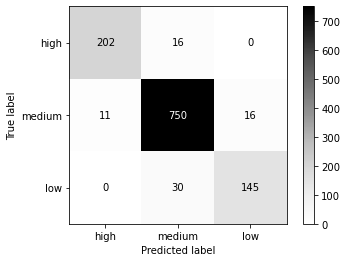

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
# 使用sklearn工具包中的ConfusionMatrixDisplay可视化混淆矩阵，参考plot_confusion_matrix
classes = ('high','medium','low')
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(ytest,ypred,labels=(2,1,0)),display_labels = classes)
disp.plot(
    include_values = True,            # 混淆矩阵每个单元格上显示具体数值
    cmap = plt.get_cmap("Greys"),                 # 不清楚啥意思，没研究，使用的sklearn中的默认值
    ax = None,                        # 同上
    xticks_rotation = "horizontal",   # 同上
    values_format = "d"# 显示的数值格式
)
plt.show()

# 调参（对比模型暂不调）

# max_iter

In [ ]:
#max_iter寻优,
from sklearn.model_selection import cross_val_score#交叉验证
scorel = []
for i in range(0,1000,10):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,activation='tanh',
                   hidden_layer_sizes=(20,10,20),max_iter = i+1, random_state=0)
# clf.fit(Xtrain,ytrain) #拟合
    
    score = cross_val_score(clf,Xtest,ytest,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,1001,10),scorel)
plt.xlabel('max_iter')
plt.ylabel('accuracy')
plt.show()
#list.index([object])
#返回这个object在列表list中的索引
# max_iter - 411 accuracy = 0.8777556734453287 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

# activation

In [35]:
from time import time
import datetime
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
times = time()
for activation in ["identity","logistic","tanh","relu"]:
    clf = MLPClassifier(solver='lbfgs'
                        ,alpha=1e-5
                        ,activation=activation
                        ,hidden_layer_sizes=(20,10,20)
                        ,max_iter = 411
                        , random_state=0
                       ).fit(Xtrain, ytrain)
    y_predict = clf.predict(Xtest)
    score=clf.score(Xtest,ytest,sample_weight=None)  
    accuracy = clf.score(Xtest,ytest)#接口score返回的是准确度accuracy
    precision = precision_score(ytest,y_predict,average = "macro")
    recall = recall_score(ytest,y_predict,average = "macro")
    f1 = f1_score(ytest,y_predict,average = "macro")
    print("%s 's testing accuracy is %f,precision is %f, recall is %f', f1 is %f" %(activation,accuracy,precision,recall,f1))
    print(datetime.datetime.utcfromtimestamp(time()-times).strftime("%M:%S:%f"))
# tanh 's testing accuracy is 0.932014,precision is 0.927134, recall is 0.928633', f1 is 0.927875
# 00:11:095844

identity 's testing accuracy is 0.729776,precision is 0.729607, recall is 0.697001', f1 is 0.711470
00:03:027390


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


logistic 's testing accuracy is 0.572289,precision is 0.190763, recall is 0.333333', f1 is 0.242656
00:03:306232


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


tanh 's testing accuracy is 0.932014,precision is 0.927134, recall is 0.928633', f1 is 0.927875
00:11:095844
relu 's testing accuracy is 0.897590,precision is 0.897483, recall is 0.893093', f1 is 0.895235
00:16:936961


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# solver

In [37]:
from time import time
import datetime
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
times = time()
for solver in ["lbfgs","sgd","adam"]:
    clf = MLPClassifier(solver=solver
                        ,alpha=1e-5
                        ,activation="tanh"
                        ,hidden_layer_sizes=(20,10,20)
                        ,max_iter = 411
                        , random_state=0
                       ).fit(Xtrain, ytrain)
    y_predict = clf.predict(Xtest)
    score=clf.score(Xtest,ytest,sample_weight=None)  
    accuracy = clf.score(Xtest,ytest)#接口score返回的是准确度accuracy
    precision = precision_score(ytest,y_predict,average = "macro")
    recall = recall_score(ytest,y_predict,average = "macro")
    f1 = f1_score(ytest,y_predict,average = "macro")
    print("%s 's testing accuracy is %f,precision is %f, recall is %f', f1 is %f" %(solver,accuracy,precision,recall,f1))
    print(datetime.datetime.utcfromtimestamp(time()-times).strftime("%M:%S:%f"))
# lbfgs 's testing accuracy is 0.932014,precision is 0.927134, recall is 0.928633', f1 is 0.927875
# 00:07:179876

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


lbfgs 's testing accuracy is 0.932014,precision is 0.927134, recall is 0.928633', f1 is 0.927875
00:07:179876


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (411) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


sgd 's testing accuracy is 0.767642,precision is 0.756953, recall is 0.745938', f1 is 0.751159
00:16:425452
adam 's testing accuracy is 0.882100,precision is 0.883422, recall is 0.868364', f1 is 0.875351
00:27:321198


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (411) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# alpha

In [39]:
# alpha为正则化强度
alphas = [1e-5,1e-4,1e-3, 1e-2, 0.1, 1, 100,1000,10000,100000]
for alpha in alphas:
    ann_model = MLPClassifier(hidden_layer_sizes=[20,10,20], activation='tanh', solver='lbfgs', random_state=0,max_iter = 411,
                             alpha=alpha)
    ann_model.fit(Xtrain, ytrain)
    print('alpha={}，准确率：{:.3f}'.format(alpha, ann_model.score(Xtest, ytest)))
#     plot_class_regions_for_classifier(ann_model, Xtest.values, ytest.values, title='Alpha={}'.format(alpha))
# alpha=1e-05，准确率：0.932

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha=1e-05，准确率：0.932


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha=0.0001，准确率：0.923


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha=0.001，准确率：0.927


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha=0.01，准确率：0.927


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha=0.1，准确率：0.931


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha=1，准确率：0.923
alpha=100，准确率：0.572
alpha=1000，准确率：0.572
alpha=10000，准确率：0.572
alpha=100000，准确率：0.572
